# Q-2.
Imagine you have a dataset where you have different features like Age ,Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms.

Now you have to build a model which can classify people into different classes.

**Dataset link:**  
https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels?resource=download

In [17]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

## Data Ingestion

In [18]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## EDA & FE

In [19]:
# Shape of the Data
df.shape

(2111, 17)

In [20]:
# Data types of the feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [21]:
# Checking for Null values in the Data
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#### Conclusion:
1. No Missing Values/ Null Values is present in the Data
2. 8 features have integer data type and remaining 8 features have object data type
3. 'NObeyesdad' is our Target Feature

In [22]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### Feature Details:
1. Gender: Represents the gender of the individual(Male or Female)
2. Age: Refers to the age of the individuals in years
3. Height: Indicates the height of the individuals in centimeter
4. Weight: Represent the weight of the individuals in kielogram
5. family_history_with_overweight: Indicates whether the individual has a family history of overweight or obesity (Yes or No).
6. FAVC: Represents the consumption of high-caloric food frequency (Frequent or Not frequent).
7. FCVC: Represents the consumption of vegetables frequency (Frequent or Not frequent).
8. NCP: Refers to the number of main meals per day (1, 2, 3, or more).
9. CAEC: Represents the consumption of food between meals frequency (Frequently, Sometimes, or No).
10. SMOKE: Indicates whether the individual is a smoker or not (Yes or No).
11. CH2O: Refers to the daily water intake (in liters).
12. SCC: Represents the calories consumption monitoring (Yes or No).
13. FAF: Refers to the physical activity frequency (0 - very low, 1 - low, 2 - medium, 3 - high, 4 - very high).
14. TUE: Represents the daily time spent on TV or computer use (0 - none, 1 - 1 hour, 2 - 2 hours, 3 - 3 hours, 4 - more than 4 hours).
15. CALC: Indicates whether the individual is using a calculator at work or school (Always, Sometimes, or No).
16. MTRANS: Represents the transportation method used (Automobile, Bike, Motorbike, Public Transportation, or Walking).
17. NOBeyesdad: Represents the class label indicating the level of obesity (Target variable). It includes different levels such as:
* Insufficient Weight
* Normal Weight
* Overweight Level I
* Overweight Level II
* Obesity Type I
* Obesity Type II
* Obesity Type III (Extreme Obesity)

## Feature Engineering:- 
### Feature 1:
**Gender:** Represents the gender of the individual(Male or Female)
* Gender is a Categorical variable without any inherent order or we can say it is Nominal Variable
* We can't use Label Encoding to convert to Geneder to Numerical Variable
* We can use OneHot Encoding to convert to Gender to Numerical Variable

In [23]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df['Gender'].dtype

dtype('O')

In [25]:
#Applying OneHot Encoder on Gender column
ohe = OneHotEncoder()

# Fit transform the categorical column
gender_encoded = ohe.fit_transform(df[['Gender']]).toarray()

df_gender = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

df_gender

,Gender_Female,Gender_Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
2106,1.0,0.0
2107,1.0,0.0
2108,1.0,0.0
2109,1.0,0.0


In [26]:
# Concate the original DataFrame with the encoded columns
df = pd.concat([df,df_gender], axis=1)

In [27]:
# Dropping 'Gender' columns
df.drop(columns=['Gender'], axis=1, inplace=True)

In [28]:
# DataFrame After update 'Gender' columns
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0
1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0
2,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0
3,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0
4,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0


### Feature 6:
**family_history_with_overweight:** Indicates whether the individual has a family history of overweight or obesity (Yes OR No)
* this categorical feature contains Ordinal Value
* this can be converted to a numeric variable by using LabelEncoder

In [29]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [30]:
df['family_history_with_overweight'].dtypes

dtype('O')

In [31]:
# Creating a instance of LabelEncoder
le = LabelEncoder()

# Using .fit_transform function to fit label encoder and return encoded label
label = le.fit_transform(df['family_history_with_overweight'])

label

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
# Encoding the 'family_history_with_overweight' column
df['family_history_with_overweight'] = label

# Updated DataFrame
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0
1,21.0,1.52,56.0,1,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0
2,23.0,1.80,77.0,1,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0
3,27.0,1.80,87.0,0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0
4,22.0,1.78,89.8,0,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0


### Feature 7:
**FAVC:** Represents the consumption of high-caloric food frequency(Frequent or Not Frequent)
* this feature contains Binary Value- yes or no
* this can be converted to a numeric variable by using LabelEncoder

In [33]:
df['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
df['FAVC'].dtypes

dtype('O')

In [35]:
# Creating a instance of LabelEncoder
le = LabelEncoder()

# Using .fit_transform function to fit label encoder and return encoded label
favc_label_encoode = le.fit_transform(df['family_history_with_overweight'])

favc_label_encoode

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
# Encoding the 'FAVC' column
df['FAVC'] = favc_label_encoode

# Updated DataFrame
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,1,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0
1,21.0,1.52,56.0,1,1,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0
2,23.0,1.80,77.0,1,1,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0


### Feature 9:
**CAEC:** Represents the consumption of food between meals frequency ('Sometimes', 'Frequently', 'Always', 'no').

* this categorical variable contain 4 values - 'Sometimes', 'Frequently', 'Always', 'no'
* we can consider this as ordinal variable with the following orders
 - 'no' = 0
 - 'Sometimes' = 1
 - 'Frequently' = 2
 - 'Always' = 3
* this encoding can be achieved by using Ordinal Number Encoding

In [37]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [38]:
caec_dic = {
    'no' : 0,
    'Sometimes' : 1,
    'Frequently' : 2,
    'Always' : 3
}

In [39]:
caec_dic

{'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

In [40]:
df['CAEC'] = df['CAEC'].map(caec_dic)

In [41]:
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,1,2.0,3.0,1,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0
1,21.0,1.52,56.0,1,1,3.0,3.0,1,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0
2,23.0,1.80,77.0,1,1,2.0,3.0,1,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,1,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,1,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0


### Feature 10:
**SMOKE:** this feature indicates whether the individual is a smoker or not(Yes or No)

* this feature contain binary values- yes or no
* this can also be encoded using Label Encoder

In [42]:
df['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [43]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label encoder and return encoded label
smoke_encoded = le.fit_transform(df['SMOKE'])
 
# printing label
smoke_encoded

array([0, 1, 0, ..., 0, 0, 0])

In [44]:
# Encoding the 'SMOKE' column
df['SMOKE'] = smoke_encoded

# Update DataFrame
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,1,2.0,3.0,1,0,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0
1,21.0,1.52,56.0,1,1,3.0,3.0,1,1,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0
2,23.0,1.80,77.0,1,1,2.0,3.0,1,0,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0


### Feature 12:
**SCC:** Represent the calories consumption monitoring(Yes or No)

* this feature contain binary values- yes or no
* this can also be encoded using Label Encoder

In [45]:
df['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [46]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label encoder and return encoded label
scc_encoded = le.fit_transform(df['SCC'])
 
# printing label
scc_encoded

array([0, 1, 0, ..., 0, 0, 0])

In [47]:
# Encoding the 'SCC' column
df['SCC'] = scc_encoded

# Updated Dataframe 
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,1,2.0,3.0,1,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0
1,21.0,1.52,56.0,1,1,3.0,3.0,1,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0
2,23.0,1.80,77.0,1,1,2.0,3.0,1,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0


### Feature 13:
**FAF:** Refers to the physical activity frequency (0 - very low, 1 - low, 2 - medium, 3 - high).

* this feature contains float values in the range [0,3]

In [48]:
df['FAF'].unique()

array([0.      , 3.      , 2.      , ..., 1.414209, 1.139107, 1.026452])

In [49]:
df['FAF'].dtypes

dtype('float64')

In [50]:
df['FAF'].describe()

count    2111.000000
mean        1.010298
std         0.850592
min         0.000000
25%         0.124505
50%         1.000000
75%         1.666678
max         3.000000
Name: FAF, dtype: float64

In [51]:
df['FAF'].value_counts()

0.000000    411
1.000000    234
2.000000    183
3.000000     75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: FAF, Length: 1190, dtype: int64

### Feature 15:
**CALC:** Indicates whether the individual is using a calculator at work or school ('no', 'Sometimes', 'Frequently', 'Always').

* this feature contains float values in the range [0,3]
    * 'no'-> 0,
    * 'Sometimes'-> 1,
    * 'Frequently'-> 2,
    * 'Always'-> 3
* We can perform the Ordinal Number Encoding

In [52]:
df['CALC'].describe()

count          2111
unique            4
top       Sometimes
freq           1401
Name: CALC, dtype: object

In [53]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [54]:
calc_dict = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

In [55]:
calc_dict

{'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

In [56]:
df['CALC'] = df['CALC'].map(calc_dict)

In [57]:
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,1,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight,1.0,0.0
1,21.0,1.52,56.0,1,1,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight,1.0,0.0
2,23.0,1.80,77.0,1,1,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II,0.0,1.0


### Feature 16:
**MTRANS:**  Represents the transportation method used ('Public_Transportation', 'Walking', 'Automobile', 'Motorbike','Bike').

* this categorical feature contain 5 different categories but there is no such specific order.
* We can perform the Ordinal Number Encoding

In [58]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [59]:
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

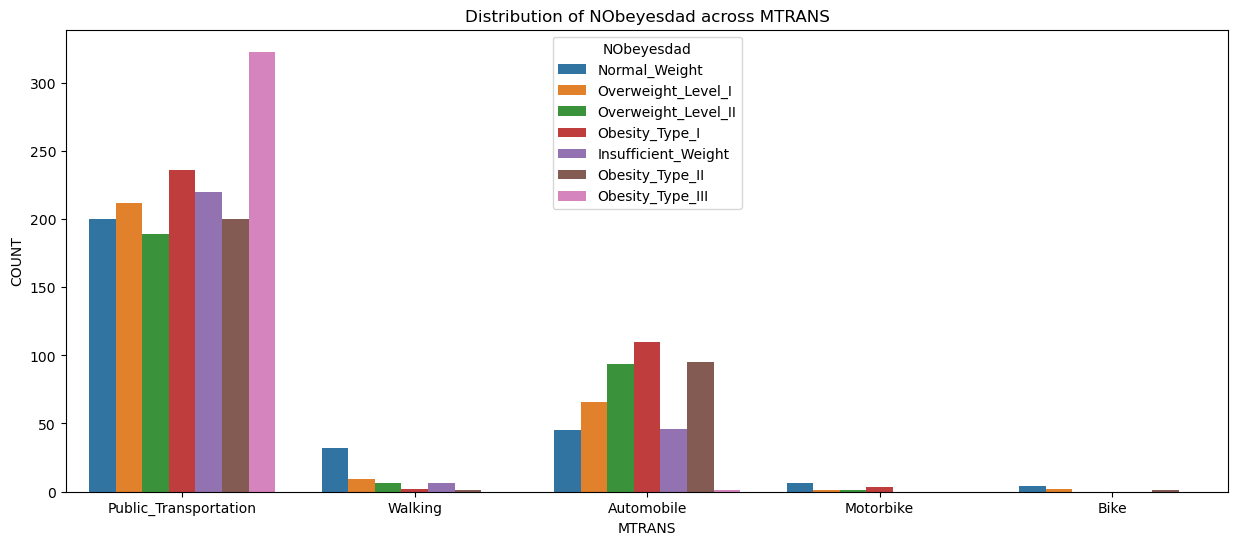

In [60]:
# Create a bar plot to compare MTRANS and NObeyesdad
plt.figure(figsize=(15,6))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=df)

# Set the labels and title
plt.xlabel('MTRANS')
plt.ylabel('COUNT')
plt.title('Distribution of NObeyesdad across MTRANS')

# Show the plot
plt.show()

In [61]:
# Initialize OneHotEncoder
ohe = OneHotEncoder()

# Fit-transform the categorical column
trans_encode = ohe.fit_transform(df[['MTRANS']]).toarray()

df_trans = pd.DataFrame(trans_encode, columns=ohe.get_feature_names_out(['MTRANS']))

df_trans

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0


In [62]:
# Concatenate the original DataFrame with the encoded columns
df = pd.concat([df,df_trans], axis=1)

In [63]:
# Dropping the original 'MTRANS' column
df.drop(columns=['MTRANS'], axis=1, inplace=True)

In [64]:
# Updated Data
df.head().T

,0,1,2,3,4
Age,21.0,21.0,23.0,27.0,22.0
Height,1.62,1.52,1.8,1.8,1.78
Weight,64.0,56.0,77.0,87.0,89.8
family_history_with_overweight,1,1,1,0,0
FAVC,1,1,1,0,0
FCVC,2.0,3.0,2.0,3.0,2.0
NCP,3.0,3.0,3.0,3.0,1.0
CAEC,1,1,1,1,1
SMOKE,0,1,0,0,0
CH2O,2.0,3.0,2.0,2.0,2.0


### Feature 17: Target Feature
**NObeyesdad:** Represents the class label indicating the level of obesity (Target variable). It includes different levels such as:  

    - Insufficient_Weight
    - Normal_Weight
    - Overweight_Level_I
    - Overweight_Level_II
    - Obesity_Type_I
    - Obesity_Type_II
    - Obesity_Type_III (Extreme Obesity)
    
* We need to apply LabelEncoding before training our model

In [65]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [66]:
# Perform Label Encoding on the Output Feature
le = LabelEncoder()
df['output_feature_encoded'] = le.fit_transform(df['NObeyesdad'])

# Optionally you can store the mapping of labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [67]:
label_mapping

{'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Obesity_Type_I': 2,
 'Obesity_Type_II': 3,
 'Obesity_Type_III': 4,
 'Overweight_Level_I': 5,
 'Overweight_Level_II': 6}

In [68]:
# Dropping 'NObeyesdad' column
df.drop(columns=['NObeyesdad'], axis=1, inplace=True)

# Updated Dataset
df.head().T

,0,1,2,3,4
Age,21.00,21.00,23.0,27.0,22.00
Height,1.62,1.52,1.8,1.8,1.78
Weight,64.00,56.00,77.0,87.0,89.80
family_history_with_overweight,1.00,1.00,1.0,0.0,0.00
FAVC,1.00,1.00,1.0,0.0,0.00
FCVC,2.00,3.00,2.0,3.0,2.00
NCP,3.00,3.00,3.0,3.0,1.00
CAEC,1.00,1.00,1.0,1.0,1.00
SMOKE,0.00,1.00,0.0,0.0,0.00
CH2O,2.00,3.00,2.0,2.0,2.00


In [69]:
df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Gender_Female', 'Gender_Male', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'output_feature_encoded'],
      dtype='object')

### Feature Separation:
Separating Input features and Target Feature

In [71]:
# Separate the input features and output variable
X = df.drop('output_feature_encoded', axis=1)
y = df['output_feature_encoded']

In [72]:
print(f"Input Features : ")
for i, feature in enumerate(X.columns):
    print(f"{i+1}) {feature}")

Input Features : 
1) Age
2) Height
3) Weight
4) family_history_with_overweight
5) FAVC
6) FCVC
7) NCP
8) CAEC
9) SMOKE
10) CH2O
11) SCC
12) FAF
13) TUE
14) CALC
15) Gender_Female
16) Gender_Male
17) MTRANS_Automobile
18) MTRANS_Bike
19) MTRANS_Motorbike
20) MTRANS_Public_Transportation
21) MTRANS_Walking


## Feature Selection

### 1. Univariate Selection
* In univariate feature selection, you can use statistical tests to determine the relationship between each feature and the target variable. Features that have a weak statistical relationship with the target variable are considered less useful or irrelevant.

#### Feature selection using the chi-square test for classification problems

In [73]:
# Apply SelectKBest with chi2 test to get feature scores
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the feature scores and p-values
feature_scores = selector.scores_
p_values = selector.pvalues_

# Sort the features by their scores in descending order
sorted_indices = feature_scores.argsort()[::-1]

In [74]:
# Create a dataframe for sorted_indices
df_sorted = pd.DataFrame(columns=['Feature', 'Score', 'p-value'])

# Iterate over the sorted_indices and add feature details to the dataframe
for idx in sorted_indices:
    feature_name = X.columns[idx]
    score = round(feature_scores[idx],2)
    p_value = round(p_values[idx], 6)
    new_row = {'Feature': feature_name, 'Score': score, 'p-value': p_value}
    df_sorted.loc[len(df_sorted)] = new_row

# Print the sorted dataframe
df_sorted

,Feature,Score,p-value
0,Weight,14186.71,0.000000
1,Age,635.64,0.000000
2,Gender_Female,332.77,0.000000
3,Gender_Male,324.98,0.000000
4,MTRANS_Automobile,121.28,0.000000
5,SCC,117.43,0.000000
6,FAVC,113.44,0.000000
7,family_history_with_overweight,113.44,0.000000
8,MTRANS_Walking,99.25,0.000000
9,CAEC,76.27,0.000000


In [75]:
df_sorted.Feature.unique()

array(['Weight', 'Age', 'Gender_Female', 'Gender_Male',
       'MTRANS_Automobile', 'SCC', 'FAVC',
       'family_history_with_overweight', 'MTRANS_Walking', 'CAEC', 'FAF',
       'CALC', 'FCVC', 'MTRANS_Public_Transportation', 'NCP', 'SMOKE',
       'TUE', 'MTRANS_Motorbike', 'CH2O', 'MTRANS_Bike', 'Height'],
      dtype=object)

#### Comments:

1. If we consider score = 25 as thresholed, then last four features('MTRANS_Motorbike', 'CH2O', 'MTRANS_Bike', 'Height') are least important.

2. If we consider p-value = 0.05 as threshold, then "Height" is the least important feature.

#### Feature selection using ANOVA

In [76]:
# Apply the ANOVA test using the f_classif function
f_scores, p_values = f_classif(X,y)

# Create a DataFrame to store the results
anova_df = pd.DataFrame({'Feature':X.columns, 'F-Score':f_scores, 'p-value':p_values})

# Sort the DataFrame based on p-values in ascending order
anova_df.sort_values('p-value', inplace=True)

anova_df['p-value'] = anova_df['p-value'].apply(lambda x: round(x, 4))

anova_df

,Feature,F-Score,p-value
2,Weight,1966.518018,0.0000
15,Gender_Male,158.712595,0.0000
14,Gender_Female,158.712595,0.0000
3,family_history_with_overweight,146.477128,0.0000
4,FAVC,146.477128,0.0000
5,FCVC,112.315462,0.0000
7,CAEC,81.096953,0.0000
0,Age,77.954154,0.0000
1,Height,38.432313,0.0000
13,CALC,33.954742,0.0000


In [77]:
anova_df.Feature.unique()

array(['Weight', 'Gender_Male', 'Gender_Female',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'Age',
       'Height', 'CALC', 'MTRANS_Automobile',
       'MTRANS_Public_Transportation', 'NCP', 'SCC', 'MTRANS_Walking',
       'FAF', 'CH2O', 'TUE', 'SMOKE', 'MTRANS_Motorbike', 'MTRANS_Bike'],
      dtype=object)

#### Comments:

1. List of least important features : 'TUE', 'SMOKE', 'MTRANS_Motorbike', 'MTRANS_Bike'

## Removing Least important features
with the help of the results of the chi2 test and ANOVA test, we can remove the following least important features:

1. 'MTRANS_Motorbike',
2. 'MTRANS_Bike'

In [78]:
X.drop(columns=['MTRANS_Motorbike', 'MTRANS_Bike'], inplace=True)

In [79]:
X.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Gender_Female', 'Gender_Male', 'MTRANS_Automobile',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

## Multicolinearity

In [80]:
# Add a constant column to the DataFrame
df_with_const = sm.add_constant(X)

# Calculate VIF for each features
vif = pd.DataFrame()
vif['Feature'] = df_with_const.columns
vif['VIF'] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF values
vif

C:\Users\Atanu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Atanu\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,const,0.000000
1,Age,2.020592
2,Height,2.616707
3,Weight,2.245156
4,family_history_with_overweight,inf
5,FAVC,inf
6,FCVC,1.228335
7,NCP,1.105563
8,CAEC,1.185162
9,SMOKE,1.036209


#### Comments:  
1. family_history_with_overweight(Indicates whether the individual has a family history of overweight or obesity (Yes or No)) is not that important feature to predict Obesity. This feature can be dropped.  


2. FAVC(the consumption of high-caloric food frequency (Frequent or Not frequent)) is not that important feature to prdict Obesity.  


3. Gender_Male and Gender_Female are similar to each other and have a huge multicolinearity effect. It will be better to keep any one of them.  


4. 'MTRANS_Automobile' and 'MTRANS_Public_Transportation' have very high VIF score. So, we must keep any one of them.  

So, we must drop following 4 columns.
* Gender_Male
* family_history_with_overweight
* FAVC
* MTRANS_Automobile

### Feature removal depending on the conclusion of the Multicolinearity test

In [81]:
X.drop(columns=['Gender_Male', 'family_history_with_overweight', 'FAVC', 'MTRANS_Automobile'], inplace=True)

In [82]:
X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O',
       'SCC', 'FAF', 'TUE', 'CALC', 'Gender_Female',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

### Checking Multicolinearity on top of updated data frame

In [83]:
# Add a constant column to the DataFrame
df_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF values
vif

,Feature,VIF
0,const,860.881498
1,Age,1.979161
2,Height,2.604765
3,Weight,1.928159
4,FCVC,1.224414
5,NCP,1.104547
6,CAEC,1.177211
7,SMOKE,1.034987
8,CH2O,1.112289
9,SCC,1.086228


#### Comment

We have successfully removed the Multicolinearity issue as all the features have a considerable VIF score.

Now we are ready to train our models.

## Train-Test Split

In [84]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Print the shape of the train and test set
print("Training set shape",X_train.shape, y_train.shape)
print("Testingset shape",X_test.shape, y_test.shape)

Training set shape (1688, 15) (1688,)
Testingset shape (423, 15) (423,)


## Standard Scaling

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Experiment 1:
Model: LogisticRegression

In [87]:
log_reg = LogisticRegression()
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled,y_train)

# Make prediction on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the accuracy of the model
logreg_accuracy = accuracy_score(y_test, y_pred)

### Experiment 2:
Model: Decision Tree

In [88]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make prediction on test data
y_pred = dt.predict(X_test)

# Evaluate the accuracy of the model
dt_accuracy = accuracy_score(y_test, y_pred)

### Experiment 3:
Model: Random Forest

In [89]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)

### Experiment 4:
Model: Support Vector Machines

In [90]:
# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(y_test, y_pred)

### Experiment 5:
Model: Gradient Boosting

In [91]:
# Create an instance of the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the model
gb_accuracy = accuracy_score(y_test, y_pred)

### Experiment 6:
Model: Neural Networks

In [92]:
# Neural Networks
# Create an instance of the MLP Classifier
mlp = MLPClassifier(max_iter=500)  # Increase max_iter value
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred)

## Find the best Model

In [93]:
models_list = ['LogReg', 'D Tree', 'R Forest', 'SVM', 'G Boosting', 'MLP']
accuracy_list = [logreg_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, gb_accuracy, mlp_accuracy]

accuracy_df = pd.DataFrame(data = {'Model':models_list, 'Accuracy':accuracy_list})

accuracy_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,D Tree,0.943262
2,R Forest,0.943262
4,G Boosting,0.943262
0,LogReg,0.851064
5,MLP,0.791962
3,SVM,0.562648


## Conclusion:
From the above chart we can see that GB, RF and DT arethe best performing models with 94% + accuracy. We can use any of them as our final model.